In [1]:
%display latex
E=48;f=50;L=10*10^(-3);C=150*10^(-6)

In [2]:
R=50;omega=2*n(pi)*f;round(omega,3);fr=omega/2*3.14
L,C,round(omega),round(fr)

(1/100, 3/20000, 314, 493)

Calcul de XL (reactancia inductiva) i XC (reactancia capacitiva), [Ohm]
Calcul de X (reactancia), [Ohm]
RECORDA:
- X positiva -> Circuit inductiu (predomina la bobina).
- X negativa -> Circuit capacitiu (predomina el condensador).
- X cero -----> Circuit ressonant, si hi ha bobina i condensador.

In [3]:
XL=omega*L;XL

3.14159265358979

In [4]:
if C<> 0: 
    XC=1/(omega*C) 
else:
    XC=0
XC

21.2206590789194

In [5]:
X=XL-XC;X

-18.0790664253296

Calcul de Z (impedancia total), [Ohm]
L'angle s'obte en radians (per a les sinusoidals).
Per veure'l millor es dona tambe en graus sexagesimals.
RECORDA:
- Angle positiu -> Circuit inductiu (predomina la bobina).
- Angle negatiu -> Circuit capacitiu (predomina el condensador).
- Angle cero ----> Circuit ressonant, si hi ha bobina i condensador.

In [6]:
Z=sqrt(R^2+X^2);print round(Z)," degrés"

53  degrés


In [7]:
if R==0:
    if X>0:
        PHI=pi/2
    else:
        if X<0:
            PHI=pi/2
        else:
            PHI=0
else:
    PHI=atan(X/R)
PHI

-0.346954775821805

In [8]:
fi=PHI*180/n(pi);fi

-19.8790443364971

###### Calcul de Emax (f.e.m. maxima d'alimentacio), [V]

In [9]:
Emax=E*sqrt(2);round(Emax,2)

67.88

###### Sinusoidal de la f.e.m. d'alimentacio, [V]

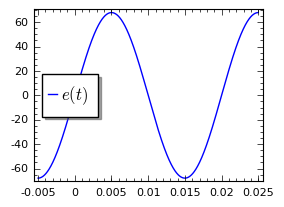

In [10]:
e(t)=Emax*sin(omega*t)
te=plot(e(t),t,-0.25/f,1.25/f,color="blue",legend_label="$e(t)$");
show(te,figsize=3,frame=True,fontsize=8,axes=False)

###### Sinusoidal de la intensitat del circuit, [A]

In [11]:
Imax=Emax/Z;round(Imax,2)

1.28

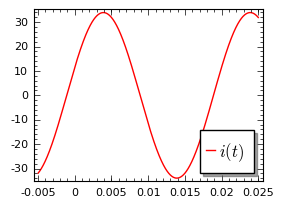

In [12]:
i(t)=Imax*sin((omega*t)-PHI)
ti=plot(Z/2*i(t),t,-0.25/f,1.25/f,color="red",legend_label="$i(t)$")
show(ti,figsize=3,frame=True,fontsize=8,axes=False)

###### Sinusoidals de les caigudes de tensio a R, L i C, [V]

In [13]:
Vrmax=Imax*R;round(Vrmax,2)

63.84

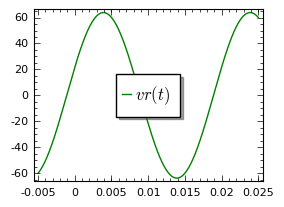

In [14]:
vr(t)=Vrmax*sin((omega*t)-PHI)
rv=plot(vr(t),t,-0.25/f,1.25/f,color="green",legend_label="$vr(t)$")
show(rv,figsize=3,frame=True,fontsize=8,axes=False)

In [15]:
Vlmax=Imax*XL;round(Vlmax,2)

4.01

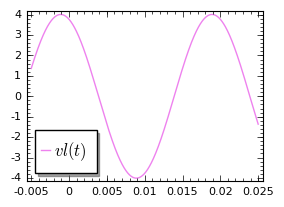

In [16]:
vl(t)=Vlmax*sin((omega*t)-PHI+(pi/2))
lv=plot(vl(t),t,-0.25/f,1.25/f,color="violet",legend_label="$vl(t)$")
show(lv,figsize=3,frame=True,fontsize=8,axes=False)

In [17]:
Vcmax=Imax*XC;round(Vcmax,2)

27.09

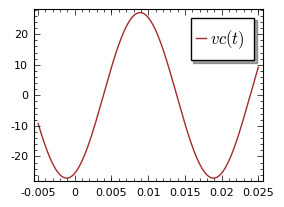

In [18]:
vc(t)=Vcmax*sin(-pi/2-PHI+omega*t)
cv=plot(vc(t),t,-0.25/f,1.25/f,color="brown",legend_label="$vc(t)$")
show(cv,figsize=3,frame=True,fontsize=8,axes=False)

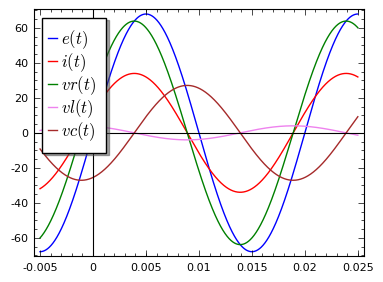

In [19]:
show(te+ti+rv+lv+cv,figsize=4,frame=True,fontsize=8)

Representacio grafica de les sinusoidals.
La intensitat es dibuixa sempre amb una amplitud la meitat de la de la tensio.

In [20]:
Ymax=max(Emax,Vrmax,Vlmax,Vcmax)

Comprovacio grafica de les tensions.
Les sinusoidals e(t) i v(t) son la mateixa funcio.
Nomes es veu una funcio perque l'altra queda amagada a sota.

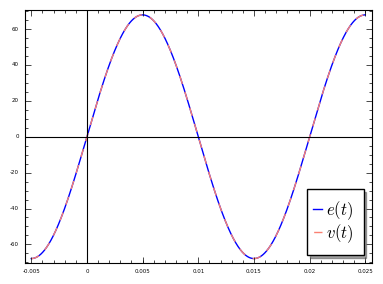

In [21]:
v(t)=vr(t)+vl(t)+vc(t)
vt=plot(v(t),t,-0.25/f,1.25/f,color="salmon",linestyle="--",
legend_label="$v(t)$")
show(te+vt,figsize=4,frame=True,fontsize=4)

In [22]:
print"PHI en degré = ",PHI*180/n(pi)

PHI en degré =  -19.8790443364971


In [23]:
if L == 0:
    C = 0
    fr= 0 
else: 
    fr=1/(2*pi*(sqrt(L*C)))
print"fr = ",round(fr), " Hz","Wr =",round(1/sqrt(L*C))

fr =  130  Hz Wr = 816


In [24]:
reset()
var('f l c');radians = pi/180.0;degrees = 180.0/pi
def argd(x):
    return N(arg(x) * degrees)
def plt(q,a,b,typ = abs,col = 'blue'):
     return plot(lambda x: float(typ(q(x))),(x,a,b),rgbcolor=col)
omega = 2*pi*f    
zs(r,l,c,f) = r + (i*omega*l) - i/(omega*c)

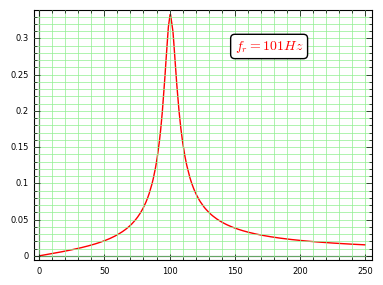

In [25]:
a = 1;b = 250;r = 3;l = 5E-2;c = 5E-5;
f0=n(1/(2*pi*(sqrt(l*c))));fr=f0
lbl = text("$f_r = %.0f Hz$" % (fr),(150,0.3),rgbcolor="red",
           horizontal_alignment="left", fontsize=10,
           vertical_alignment="top",
        bounding_box={'boxstyle':'round', 'fc':'w'}  )
q(f) = zs(r,l,c,f);p1 = plt(1/q,a,b,abs,"red")
zs(r,l,c,f) = r + (i*omega*l) - i/(omega*c)
show(p1+lbl,figsize=(4,3),fontsize=6,
     frame=True,gridlines="minor",
     gridlinesstyle=dict(color="lightgreen", 
                         linestyle="-",
                         linewidth="0.5"))  

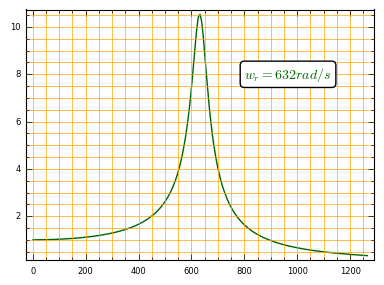

In [26]:
var("omega")
R=3;L=5E-2;C=5E-5;w=1/(sqrt(L*C));
p=plot(abs(1/(1+i*omega*R*C-omega*omega*L*C)),
       [omega,0,2*w],color="darkgreen")
f=w;r=R;c=C;l=L
lbl = text("$w_r = %.0f rad/s$" % (f),(800,8),
           rgbcolor="darkgreen",
           horizontal_alignment="left",
           fontsize=10,
           bounding_box={'boxstyle':'round', 'fc':'w'})
show(p+lbl,figsize=4,frame=True,axes=False,
     gridlines="minor",fontsize=6,
     gridlinesstyle=dict(color="orange",
                         linestyle="-",
                         linewidth="0.5"))

In [27]:
zs

(r, l, c, f) |--> 2*I*pi*f*l + r - 1/2*I/(pi*c*f)

In [28]:
reset()
%display latex

In [29]:
var('m,k,t,x0,v0') 
assume(m>0) 
assume(k>0) 
assume(t>0) 
x = function('x')(t);x

x(t)

In [30]:
de = m*diff(x,t,2)==-k*x;de

m*diff(x(t), t, t) == -k*x(t)

In [31]:
sol = desolve(de, x, ivar=t);sol 

_K2*cos(sqrt(k)*t/sqrt(m)) + _K1*sin(sqrt(k)*t/sqrt(m))

In [32]:
var('k1,k2'); sol.subs(t=0)==x0 

_K2 == x0

In [33]:
sol = sol.subs(_); sol 

x0*cos(sqrt(k)*t/sqrt(m)) + _K1*sin(sqrt(k)*t/sqrt(m))

In [34]:
diff(sol, t)(t=0)==v0 

_K1*sqrt(k)/sqrt(m) == v0

In [35]:
sol = sol.subs(_); sol 

x0*cos(sqrt(k)*t/sqrt(m)) + _K1*sin(sqrt(k)*t/sqrt(m))

In [36]:
sol = desolve(de, x, ivar=t, ics=[0,x0,v0]) ;sol

x0*cos(sqrt(k)*t/sqrt(m)) + sqrt(m)*v0*sin(sqrt(k)*t/sqrt(m))/sqrt(k)

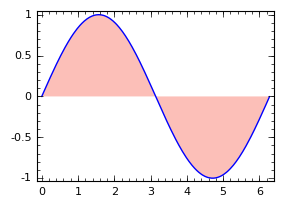

In [37]:
a=plot(sol(m=1,k=1,x0=0,v0=1), (t,0,6.28),
       fill=True,fillcolor="salmon") 
show(a,figsize=3,frame=True,fontsize=8,axes=False)

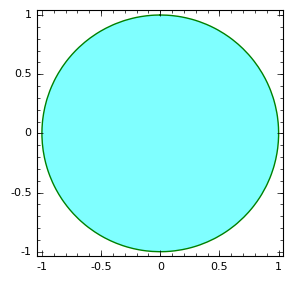

In [38]:
c=parametric_plot(( sol(m=1,k=1,x0=0,v0=1),
                 diff(sol,t)(m=1,k=1,x0=0,v0=1)),
                  (t,0,6.28),color="green",
                  fill=True,fillcolor="cyan") 
show(c,figsize=4,frame=True,fontsize=8,axes=False)

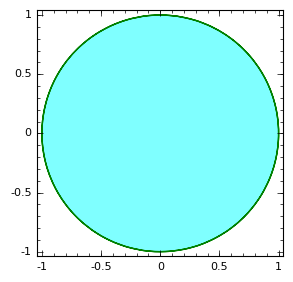

In [39]:
ci=parametric_plot((-sol(m=1,k=1,x0=0,v0=1),
                 diff(-sol,t)(m=1,k=1,x0=0,v0=1)),
                  (t,-6.28,6.28),color="green",
                  fill=True,fillcolor="cyan") 
show(ci,figsize=4,frame=True,fontsize=8,axes=False)